In [36]:
import pandas as pd

# Load the dataset without parsing dates
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv')

# Print the column names to verify the 'DATE' column exists
print(df.columns)


Index(['Date', ' GDP (Billions of US $)', ' Per Capita (US $)'], dtype='object')


In [38]:
df.head()

,Date,GDP (Billions of US $),Per Capita (US $)
0,12/31/1980,8.951800,429.0220
1,12/31/1981,10.751163,495.4864
2,12/31/1982,8.735294,387.7712
3,12/31/1983,8.230154,354.1902
4,12/31/1984,10.447615,439.5503


In [42]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


Cleaned Columns: Index(['Date', 'GDP_(Billions_of_US_$)', 'Per_Capita_(US_$)'], dtype='object')


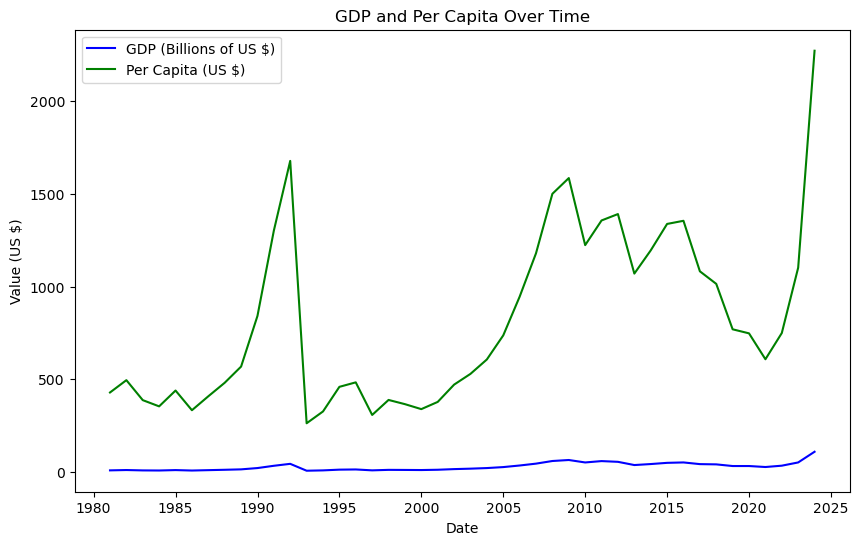

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv', parse_dates=['Date'])

# Clean up the column names (remove leading/trailing spaces and replace spaces inside names with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Check the exact column names to verify
print("Cleaned Columns:", df.columns)

# Now, plot the GDP and Per Capita data over time (using the cleaned column names)
plt.figure(figsize=(10, 6))

# Plot GDP (Billions of US $) and Per Capita (US $) using the cleaned column names
plt.plot(df['Date'], df['GDP_(Billions_of_US_$)'], label='GDP (Billions of US $)', color='blue')
plt.plot(df['Date'], df['Per_Capita_(US_$)'], label='Per Capita (US $)', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value (US $)')
plt.title('GDP and Per Capita Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()


Cleaned Columns: Index(['Date', 'GDP_(Billions_of_US_$)', 'Per_Capita_(US_$)'], dtype='object')


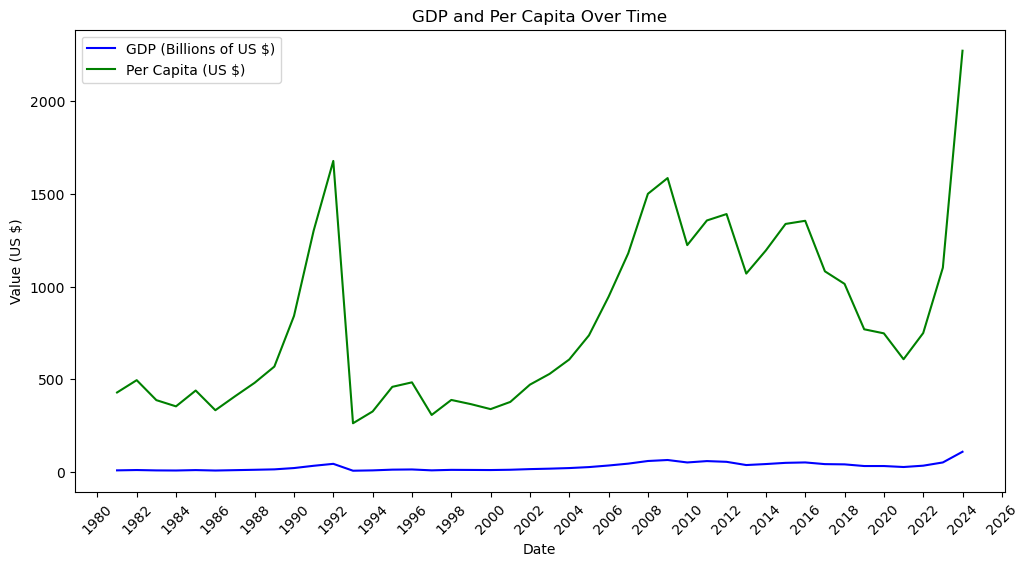

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the dataset
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv', parse_dates=['Date'])

# Clean up the column names (remove leading/trailing spaces and replace spaces inside names with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Check the cleaned column names
print("Cleaned Columns:", df.columns)

# Plot the GDP and Per Capita data over time (using the cleaned column names)
plt.figure(figsize=(12, 6))

# Plot GDP (Billions of US $) and Per Capita (US $)
plt.plot(df['Date'], df['GDP_(Billions_of_US_$)'], label='GDP (Billions of US $)', color='blue')
plt.plot(df['Date'], df['Per_Capita_(US_$)'], label='Per Capita (US $)', color='green')

# Set the x-axis labels to show every 2 years
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Set a 2-year interval
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value (US $)')
plt.title('GDP and Per Capita Over Time')

# Show legend
plt.legend()

# Display the plot
plt.show()


# ADF TEST

In [85]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the dataset (assuming 'Date' is already parsed as datetime)
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv', parse_dates=['Date'])

# Clean up the column names (remove leading/trailing spaces and replace spaces inside names with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Function to perform ADF test and print the result
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is likely stationary (reject H0).")
    else:
        print("The series is likely non-stationary (fail to reject H0).")

# Perform the ADF test on GDP and Per Capita (you can add other variables as needed)
print("ADF Test for GDP (Billions of US $):")
adf_test(df['GDP_(Billions_of_US_$)'])

print("\nADF Test for Per Capita (US $):")
adf_test(df['Per_Capita_(US_$)'])


ADF Test for GDP (Billions of US $):
ADF Statistic: -0.13168327688721904
p-value: 0.9461898811332179
Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
The series is likely non-stationary (fail to reject H0).

ADF Test for Per Capita (US $):
ADF Statistic: -1.4817545461926633
p-value: 0.5425170243022939
Critical Values: {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
The series is likely non-stationary (fail to reject H0).


# COINTERGRATION

In [92]:
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Load the dataset (assuming 'Date' is already parsed as datetime)
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv', parse_dates=['Date'])

# Clean up the column names (remove leading/trailing spaces and replace spaces inside names with underscores)
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Select the relevant columns for cointegration (GDP and Per Capita)
df_selected = df[['GDP_(Billions_of_US_$)', 'Per_Capita_(US_$)']]

# Perform Johansen Cointegration Test
johansen_test = coint_johansen(df_selected, det_order=0, k_ar_diff=1)

# Print the test results
print("Johansen Cointegration Test Results:")
print(f"Eigenvalues:\n{johansen_test.eig}")
print(f"Trace Statistic:\n{johansen_test.lr1}")
print(f"Critical Values (5%):\n{johansen_test.cvt[:, 1]}")

# Interpretation based on Trace Statistic
print("\nInterpretation:")
for i, trace_stat in enumerate(johansen_test.lr1):
    if trace_stat > johansen_test.cvt[i, 1]:
        print(f"At index {i}, the trace statistic is greater than the 5% critical value, suggesting cointegration.")
    else:
        print(f"At index {i}, the trace statistic is less than the 5% critical value, suggesting no cointegration.")


Johansen Cointegration Test Results:
Eigenvalues:
[0.24588517 0.00924795]
Trace Statistic:
[12.24306768  0.3902212 ]
Critical Values (5%):
[15.4943  3.8415]

Interpretation:
At index 0, the trace statistic is less than the 5% critical value, suggesting no cointegration.
At index 1, the trace statistic is less than the 5% critical value, suggesting no cointegration.


# Vector Autoregression Model

        Date   GDP (Billions of US $)   Per Capita (US $)
0 1980-12-31                 8.951800            429.0220
1 1981-12-31                10.751163            495.4864
2 1982-12-31                 8.735294            387.7712
3 1983-12-31                 8.230154            354.1902
4 1984-12-31                10.447615            439.5503


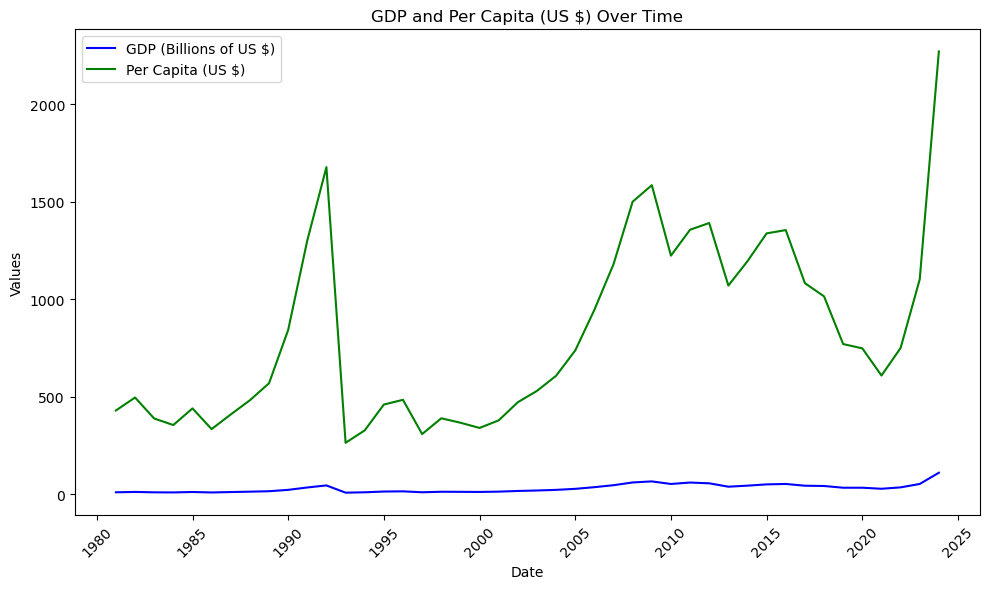

GDP ADF Test p-value: 0.9461898811332179
Per Capita ADF Test p-value: 0.5425170243022939
Optimal lag order selected: 1
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 28, Nov, 2024
Time:                     22:21:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.4949
Nobs:                     42.0000    HQIC:                   14.3376
Log likelihood:          -412.370    FPE:                1.53972e+06
AIC:                      14.2466    Det(Omega_mle):     1.34127e+06
--------------------------------------------------------------------
Results for equation  GDP (Billions of US $)
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              1.253579         1.88216

C:\Users\HP 1040 G7 X360\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP 1040 G7 X360\AppData\Local\Temp\ipykernel_19652\3058769588.py:70: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(df['Date'].iloc[-1], periods=forecast_steps+1, freq='A')[1:], forecast_df[' GDP (Billions of US $)'], label='Forecasted GDP', linestyle='--', color='red')
C:\Users\HP 1040 G7 X360\AppData\Local\Temp\ipykernel_19652\3058769588.py:71: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(df['Date'].iloc[-1], periods=forecast_steps+1, freq='A')[1:], forecast_df[' Per Capita (US $)'], label='Forecasted Per Capita', linestyle='--', color='orange')


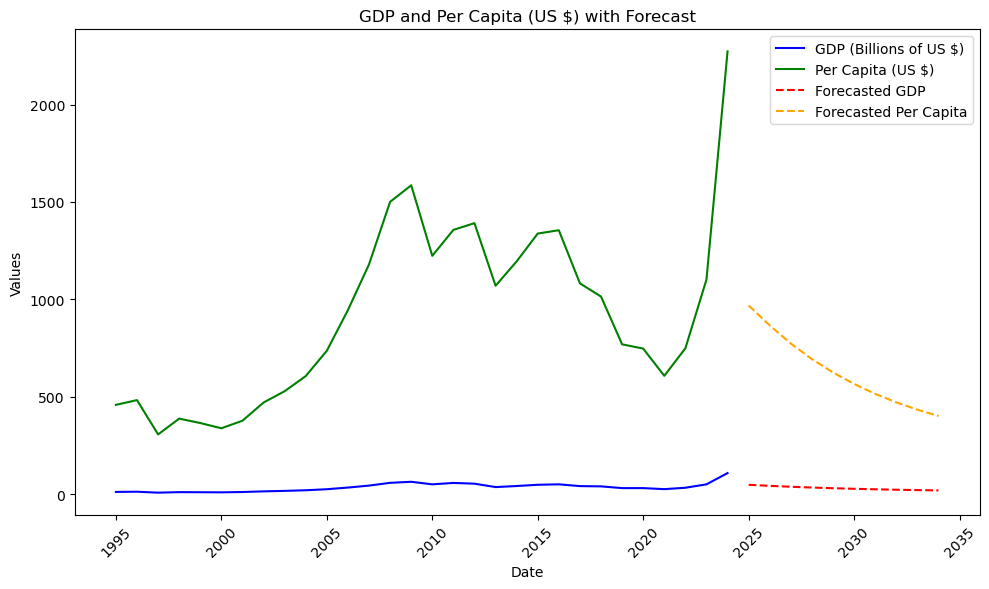

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

# Load the dataset (assuming the dataset has been cleaned as per your steps)
df = pd.read_csv(r'D:/Data Science/BARACH DATASET.csv', parse_dates=['Date'])

# Drop rows with missing values if any
df = df.dropna()

# Check the structure of the data (ensure columns are properly named)
print(df.head())

# Step 1: Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df[' GDP (Billions of US $)'], label='GDP (Billions of US $)', color='blue')
plt.plot(df['Date'], df[' Per Capita (US $)'], label='Per Capita (US $)', color='green')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('GDP and Per Capita (US $) Over Time')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 2: Check for stationarity of the time series using ADF test

# ADF test for GDP (Billions of US $)
gdp_adf = adfuller(df[' GDP (Billions of US $)'].dropna())
print(f"GDP ADF Test p-value: {gdp_adf[1]}")

# ADF test for Per Capita (US $)
per_capita_adf = adfuller(df[' Per Capita (US $)'].dropna())
print(f"Per Capita ADF Test p-value: {per_capita_adf[1]}")

# Step 3: Since the series are non-stationary, we will difference the data to make it stationary

# Difference the data
df_diff = df[[' GDP (Billions of US $)', ' Per Capita (US $)']].diff().dropna()

# Step 4: Fit the VAR model with reduced maxlags

# Initialize the VAR model
model = VAR(df_diff)

# Automatically select the optimal lag length using AIC criterion
lag_order = model.select_order(maxlags=10).aic
print(f"Optimal lag order selected: {lag_order}")

# Fit the VAR model with the selected lag length
model_fitted = model.fit(lag_order, ic='aic')

# Step 5: Display the summary of the fitted model
print(model_fitted.summary())

# Step 6: Forecasting (Optional)
forecast_steps = 10  # Number of steps to forecast

# Forecasting from the last `lag_order` observations
forecast = model_fitted.forecast(df_diff.values[-lag_order:], steps=forecast_steps)

# Convert forecast into a DataFrame for better visualization
forecast_df = pd.DataFrame(forecast, columns=df_diff.columns)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df['Date'].tail(30), df[' GDP (Billions of US $)'].tail(30), label='GDP (Billions of US $)', color='blue')
plt.plot(df['Date'].tail(30), df[' Per Capita (US $)'].tail(30), label='Per Capita (US $)', color='green')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=forecast_steps+1, freq='A')[1:], forecast_df[' GDP (Billions of US $)'], label='Forecasted GDP', linestyle='--', color='red')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=forecast_steps+1, freq='A')[1:], forecast_df[' Per Capita (US $)'], label='Forecasted Per Capita', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('GDP and Per Capita (US $) with Forecast')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
